In [1]:
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
X = cancer_data.data
Y = cancer_data.target
print('Input data size :', X.shape)
print('Output data size :', Y.shape)
print('Label names:', cancer_data.target_names)
n_pos = (Y == 1).sum()
n_neg = (Y == 0).sum()
print(f'{n_pos} positive samples and {n_neg} negative samples')

Input data size : (569, 30)
Output data size : (569,)
Label names: ['malignant' 'benign']
357 positive samples and 212 negative samples


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [4]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, random_state=42)

In [5]:
clf.fit(X_train, Y_train)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
 decision_function_shape='ovr', degree=3,
 gamma='auto_deprecated', kernel='linear', max_iter=-1,
 probability=False, random_state=42, shrinking=True,
 tol=0.001, verbose=False)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'auto_deprecated'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accurracy*100:.1f}%')

The accuracy is: 95.6%


### Classificadores com mais de 2 classes

In [9]:
from sklearn.datasets import load_wine
wine_data = load_wine()
X = wine_data.data
Y = wine_data.target
print('Input data size: ', X.shape)
print('Output data size: ', Y.shape)
print('Label names: ', wine_data.target_names)
n_class0 = (Y == 0).sum()
n_class1 = (Y == 1).sum()
n_class2 = (Y == 2).sum()
print(f'{n_class0} class0 samples, \n{n_class1} class1 samples, \n{n_class2} class2 samples,')



Input data size:  (178, 13)
Output data size:  (178,)
Label names:  ['class_0' 'class_1' 'class_2']
59 class0 samples, 
71 class1 samples, 
48 class2 samples,


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [11]:
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, Y_train)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
 decision_function_shape='ovr', degree=3,
 gamma='auto_deprecated', kernel='linear', max_iter=-1,
 probability=False, random_state=42, shrinking=True,
 tol=0.001, verbose=False)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'auto_deprecated'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [14]:
accuracy = clf.score(X_test, Y_test)
print(f'The accuracy is: {accuracy*100:.1f}%')

The accuracy is: 100.0%


In [15]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



Claro! Vou te explicar de forma simples e objetiva o que é um **classificador SVM**.

---

## O que é SVM?

**SVM** significa **Support Vector Machine** (Máquina de Vetores de Suporte).  
É um algoritmo de **classificação supervisionada** muito usado em ciência de dados e machine learning.

---

## Como funciona?

O objetivo do SVM é **encontrar a melhor linha (ou hiperplano)** que separa as classes dos seus dados.  
- Em 2D, essa linha é uma reta.
- Em 3D, é um plano.
- Em dimensões maiores, é chamado de **hiperplano**.

O SVM busca o **hiperplano que deixa a maior margem possível** entre as classes, ou seja, a maior distância entre os pontos mais próximos de cada classe (os chamados **vetores de suporte**).

---

## Por que é útil?

- **Robustez:** SVM funciona bem mesmo com poucos dados e com dados de alta dimensão.
- **Flexibilidade:** Usando o chamado **kernel trick**, o SVM pode separar dados que não são linearmente separáveis, projetando-os em um espaço de dimensão maior.

---

## Exemplo visual

Imagine que você tem dois grupos de pontos (vermelhos e azuis) em um gráfico.  
O SVM vai desenhar uma linha que separa esses grupos, tentando deixar a maior “folga” possível entre os pontos mais próximos de cada grupo.

---

## Resumindo

- SVM é um classificador que busca a melhor separação entre classes.
- Ele usa os pontos mais próximos da fronteira (vetores de suporte) para definir essa separação.
- Pode ser usado para classificação binária, multiclasse e até para regressão (SVR).

---

Se quiser um exemplo prático em Python ou quiser ver um gráfico ilustrando, só pedir!

In [ ]:
# 1. O problema dos dados não linearmente separáveis
# Os pontos das duas classes (8 de cada) estão distribuídos de forma que não é possível traçar uma linha reta que separe perfeitamente as classes.
# Isso é comum em problemas reais, onde as classes se misturam de forma complexa.

# 2. O papel do kernel
# O kernel é uma função que transforma os dados em um espaço de dimensão maior, onde pode ser possível separar as classes com um hiperplano (ou linha, no caso 2D).
# O kernel RBF (Radial Basis Function), também chamado de gaussiano, é um dos mais usados para isso.

# 3. O parâmetro gamma
# O gamma controla o quanto cada ponto de dado influencia a decisão do SVM.
# Gamma baixo: a influência de cada ponto é mais “espalhada”, a fronteira de decisão é mais suave.
# Gamma alto: a influência é mais “local”, a fronteira de decisão pode ficar mais complexa e até “encaixar” demais nos dados (overfitting).

# 4. O que o código faz
# Cria os dados de duas classes.
# Para cada valor de gamma (1, 2, 4), treina um SVM com kernel RBF.
# Plota os dados e a fronteira de decisão aprendida pelo SVM para cada gamma.

# 5. O que você aprende com isso
# SVM com kernel consegue separar dados que não são separáveis por linha reta.
# O ajuste do gamma muda o formato da fronteira de decisão.
# Visualmente, você vê como a escolha do kernel e dos hiperparâmetros afeta o resultado do classificador.


import numpy as np
import matplotlib.pyplot as plt
X = np.c_[# negative class
(.3, -.8),
(-1.5, -1),
(-1.3, -.8),
(-1.1, -1.3),
(-1.2, -.3),
(-1.3, -.5),
(-.6, 1.1),
(-1.4, 2.2),
(1, 1),
# positive class
(1.3, .8),
(1.2, .5),
(.2, -2),
(.5, -2.4),
(.2, -2.3),
(0, -2.7),
(1.3, 2.1)].T
Y = [-1] * 8 + [1] * 8

C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_4044\1735940271.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=['b']*8+['r']*8,


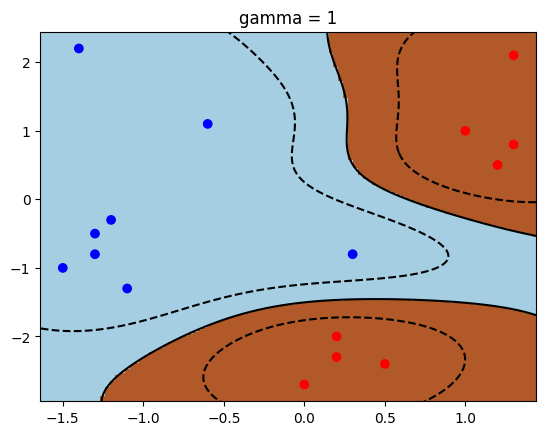

C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_4044\1735940271.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=['b']*8+['r']*8,


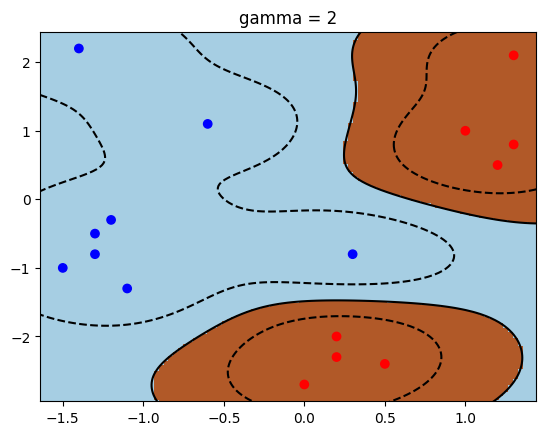

C:\Users\aoliveira_esss\AppData\Local\Temp\ipykernel_4044\1735940271.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=['b']*8+['r']*8,


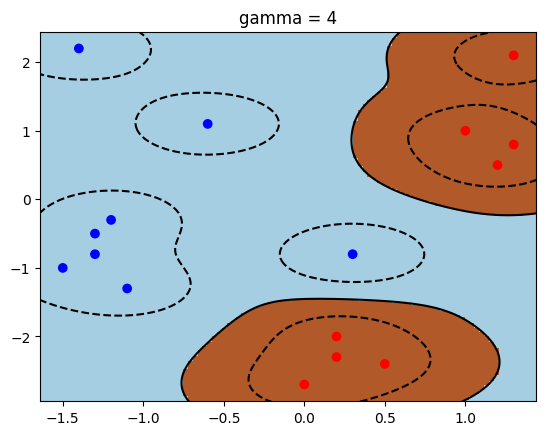

In [19]:
import matplotlib.pyplot as plt
gamma_option = [1, 2, 4]
for i, gamma in enumerate(gamma_option, 1):
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X, Y)
    plt.scatter(X[:, 0], X[:, 1], c=['b']*8+['r']*8, 
    zorder=10, cmap=plt.cm.Paired)
    plt.axis('tight')
    XX, YY = np.mgrid[-3:3:200j, -3:3:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
    linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title('gamma = %d' % gamma)
    plt.show()

In [23]:
# ### **O que significa o parâmetro gamma no SVM com kernel RBF?**

# - **Gamma pequeno:**  
#   - A influência de cada ponto de dado é mais ampla.
#   - A fronteira de decisão é mais suave e “larga”.
#   - O modelo é **menos sensível** aos dados de treino (pode subajustar, ou seja, underfitting).

# - **Gamma grande:**  
#   - A influência de cada ponto é muito local.
#   - A fronteira de decisão fica “apertada” ao redor dos pontos de treino.
#   - O modelo é **mais sensível** aos dados de treino (pode superajustar, ou seja, overfitting).

# ---

# ### **Por que ajustar o gamma é importante?**

# - Se gamma for **muito baixo**, o modelo pode não capturar bem a separação entre as classes.
# - Se gamma for **muito alto**, o modelo pode se ajustar demais aos dados de treino e errar em novos dados.
# - **Validação cruzada** (cross-validation) é usada para encontrar o valor de gamma que traz o melhor equilíbrio entre ajuste e generalização.

# ---

# ### **Resumo visual:**

# - **Gamma baixo:** Fronteira de decisão suave, menos detalhes, menos risco de overfitting.
# - **Gamma alto:** Fronteira de decisão complexa, mais detalhes, maior risco de overfitting.


In [27]:
import pandas as pd

df = pd.read_csv('ad_click_dataset.csv')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB
None
     id full_name   age      gender device_type ad_position browsing_history  \
0   670   User670  22.0         NaN     Desktop         Top         Shopping   
1  3044  User3044   NaN        Male     Desktop         Top              NaN   
2  5912  User5912  41.0  Non-Binary         NaN        Side        

In [28]:
print(df.isnull().sum())

id                     0
full_name              0
age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
click                  0
dtype: int64


In [29]:
# Preencher idade faltante com a mediana
df['age'] = df['age'].fillna(df['age'].median())

# Preencher browsing_history e time_of_day com 'Unknown'
df['browsing_history'] = df['browsing_history'].fillna('Unknown')
df['time_of_day'] = df['time_of_day'].fillna('Unknown')

In [30]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



In [31]:
X = df_encoded.drop(['id', 'full_name', 'click'], axis=1)
y = df_encoded['click']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1, 10],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

# Use o melhor modelo encontrado pelo GridSearchCV
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[417 288]
 [322 973]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.58       705
           1       0.77      0.75      0.76      1295

    accuracy                           0.69      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.70      0.69      0.70      2000



In [ ]:
Ótimo ponto!
Vamos deixar o texto ainda mais direto, sem redundâncias e sem frases genéricas.
Aqui vai uma versão revisada, com um título mais objetivo e um início que já mostra o contexto e o impacto:

Previsão de cliques em anúncios: como um modelo de classificação pode mudar a estratégia

Utilizando dados reais de comportamento e perfil de usuários, desenvolvi um modelo de classificação que responde, para cada pessoa: “vai clicar” ou “não vai clicar”.

Resultados práticos:

Quando o modelo prevê que alguém vai clicar, acerta 77% das vezes.
Quando prevê que alguém não vai clicar, acerta 56% das vezes.
Ele identifica 75% de todos os usuários que realmente clicam, e 59% dos que realmente não clicam.

Com isso, é possível priorizar quem tem mais chance de engajar e evitar insistir com quem não tem interesse.
O resultado: menos desperdício de esforço, mais foco em quem importa, decisões baseadas em dados reais.

Esse é o tipo de solução que transforma dados em ação concreta.

#CienciaDeDados #DecisaoBaseadaEmDados #MarketingDigital

Se quiser ajustar ainda mais o tom, ou incluir algum detalhe do seu processo, só avisar!